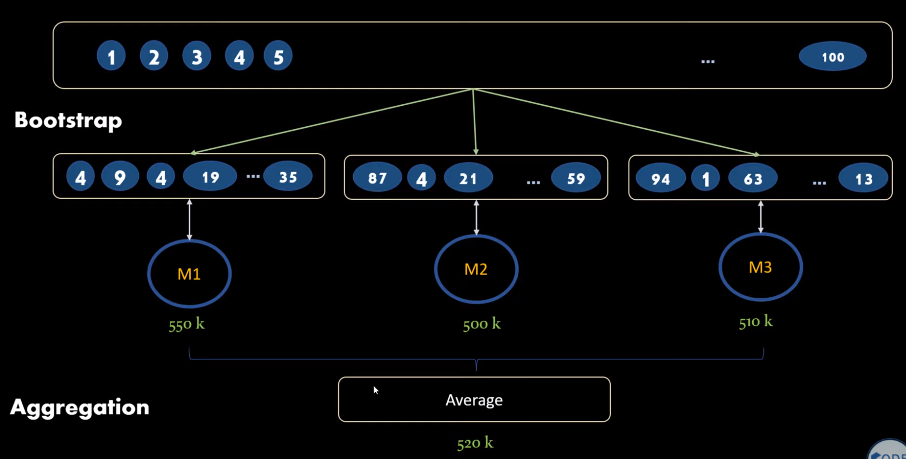
**Random forest algortihm is also one of the bagging technique with only one distinction. In the random forest we sample both data set and feature.**
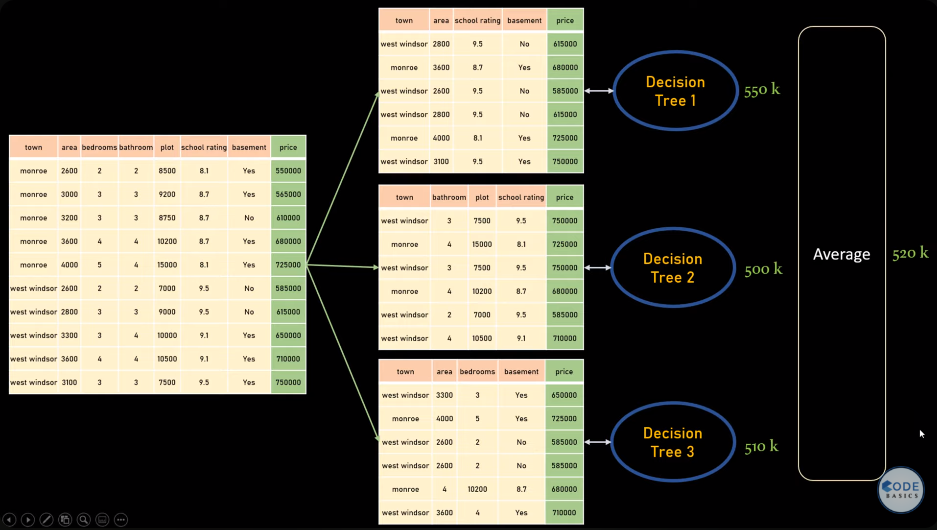
**Bagging: Underlying model can be anything (SVM, KNN, Logistic Regression etc.)**

**Bagged Trees: Each model is a tree.**

In [1]:
import pandas as pd
df = pd.read_excel("diabetes.xlsx")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [3]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
#Check the balance of fitting
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [5]:
268/500

0.536

it is unbalanced but not too high

In [6]:
X = df.drop("Outcome", axis=1)
y = df.Outcome

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled[:3]

array([[ 0.63994726,  0.84832379,  0.14964075,  0.90726993, -0.69289057,
         0.20401277,  0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575,  0.53090156, -0.69289057,
        -0.68442195, -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, -1.28821221, -0.69289057,
        -1.10325546,  0.60439732, -0.10558415]])

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, stratify=y, random_state=10)

In [10]:
X_train.shape

(576, 8)

In [11]:
X_test.shape

(192, 8)

In [12]:
y_train.value_counts()

0    375
1    201
Name: Outcome, dtype: int64

In [13]:
201/375

0.536

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
scores = cross_val_score(DecisionTreeClassifier(), X, y, cv=5)
scores

array([0.66883117, 0.67532468, 0.66233766, 0.79084967, 0.73202614])

In [15]:
scores.mean()

0.7058738646973941

In [17]:
#Out of bag = oob
from sklearn.ensemble import BaggingClassifier
bag_model = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(),
    n_estimators=100,
    max_samples=0.8,
    oob_score=True,
    random_state=0
)
bag_model.fit(X_train,y_train)
bag_model.oob_score_

0.7534722222222222

In [18]:
bag_model.score(X_test, y_test)

0.7760416666666666

In [19]:
bag_model = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(),
    n_estimators=100,
    max_samples=0.8,
    oob_score=True,
    random_state=0
)
scores = cross_val_score(bag_model, X, y, cv=5)
scores.mean()

0.7578728461081402

In [20]:
from sklearn.ensemble import RandomForestClassifier
scores = cross_val_score(RandomForestClassifier(), X, y, cv=5)
scores.mean()

0.756574144809439